In [1]:
# 이 셀은 VSCode 환경에서만 실행할 것!
%cd ..

c:\Users\jeong\Desktop\state-farm-distracted-driver-detection


In [2]:
import torch
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
from PIL import Image
from torch.utils.model_zoo import load_url as load_state_dict_from_url

import src.models as models
from src.utils.imagenet_label import label_dict

In [3]:
MODEL_URL = "https://download.pytorch.org/models/vgg11-bbd30ac9.pth"

# 모델 생성
model = models.VGG11()

# pretrained weights 불러오기
state_dict_pretrained = load_state_dict_from_url(MODEL_URL, progress=True)

# weights 적용
model.load_state_dict(state_dict_pretrained)

<All keys matched successfully>

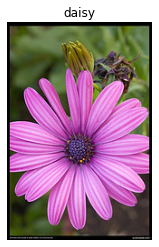

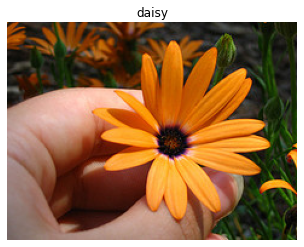

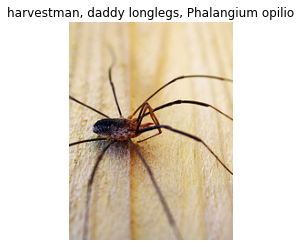

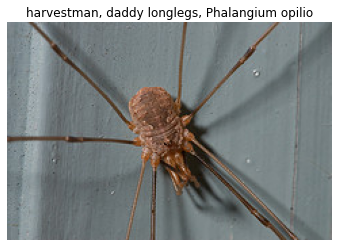

In [4]:
# 이미지 사이즈 및 정규화
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

def visualize_prediction(img_path):
    img = Image.open(img_path)
    # 모델의 입력 shape이 [batch, channel, height, width]가 되야하므로
    # unsqueeze_함수를 통해 앞에 차원추가
    x = transform(img).unsqueeze_(0)
    y = model(x)[0].argmax()
    plt.axis('off'); plt.title(label_dict[y.item()]); plt.imshow(img); plt.show()

for img_path in ["data/img0.jpg", "data/img1.jpg", "data/img2.jpg", "data/img3.jpg"]:
    visualize_prediction(img_path)